# Project Description: Twitter US Airline Sentiment

## Data Description:

A sentiment analysis job about the problems of each major US airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:

The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website.

The dataset has the following columns:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

## Objective:

To implement the techniques learnt as a part of the course.

## Learning Outcomes:

- Basic understanding of text pre-processing
- What to do after text pre-processing
    - Bag of words
    - Tf-idf
- Build the classification model
- Evaluate the model

## Steps & Tasks:

1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)


# Step 1: Load Dataset

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string
import warnings

import tensorflow as tf

pd.set_option("display.max_colwidth", None) # Displays twitter text without truncating
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read Dataset
data = pd.read_csv('/content/drive/My Drive/My Mac/Matter_of_Life/Technologies/Machine Learning/Course-GL/ML-UOT/Projects/Project 8/Tweets.csv')

In [ ]:
# View dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Shape of dataset
data.shape

(14640, 15)

In [ ]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Step 2: Data Analysis 

In [ ]:
# Description of dataset
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
# Columns of dataset
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Example of Negative tweets
data[data['airline_sentiment'] == 'negative']['text'].head()

3                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                       @VirginAmerica and it's a really big bad thing about it
5      @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
15                                                                                                @VirginAmerica SFO-PDX schedule is still MIA.
17    @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!
Name: text, dtype: object

In [ ]:
# Example of Positive tweets
data[data['airline_sentiment'] == 'positive']['text'].head()

1                @VirginAmerica plus you've added commercials to the experience... tacky.
6         @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
8                                         @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
11    @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
Name: text, dtype: object

In [ ]:
# Example of Neutral tweets
data[data['airline_sentiment'] == 'neutral']['text'].head()

0                                                                              @VirginAmerica What @dhepburn said.
2                                          @VirginAmerica I didn't today... Must mean I need to take another trip!
7     @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
10                 @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
23                                 @VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?
Name: text, dtype: object

In [ ]:
# Different types of airlines
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

> There are more number of tweets for 'United' airlines and least for 'Virgin America' airlines.

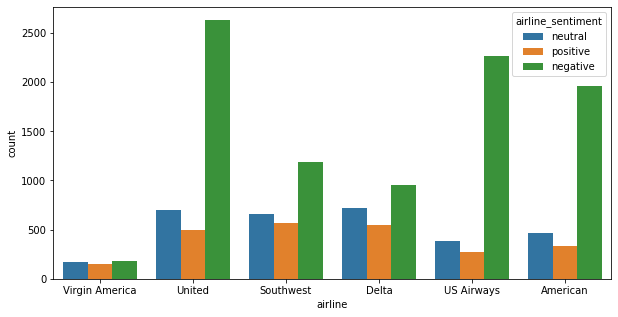

In [ ]:
# sentiments for different airlines
plt.figure(figsize = (10,5));
sns.countplot(x = data['airline'], hue = data['airline_sentiment']);

> Among different tweets for airlines, maximum number of negative tweets are for 'United' airlines, max number of neutral tweets are for 'United', 'Southwest' and 'Delta' airlines, and max number of positive tweets are for 'Southwest' and 'Delta' airlines. 

In [ ]:
# Reasons for negative tweets
print(data['negativereason'].unique())
print('\nTop Reasons for negative tweets:')
print(data['negativereason'].value_counts())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']

Top Reasons for negative tweets:
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


> The most popular reasons for negative tweets are customer service issues, late flight, cancelled flight, lost lugagge, bad flight, flight booking problems, flight attendant complaints, longliness, and least number of negative tweets for damaged luggage. 

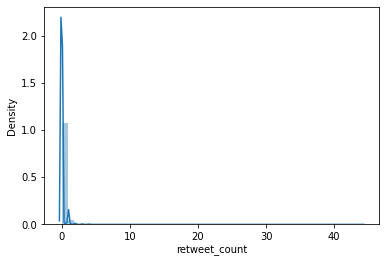

In [ ]:
# Number of times tweets are retweeted
sns.distplot(data['retweet_count']);

In [ ]:
# airline sentiments that are retweeted maximum number of times
data[data['retweet_count'] > 10][['retweet_count', 'airline_sentiment']].sort_values(by = 'retweet_count')

,retweet_count,airline_sentiment
7453,11,positive
7111,15,neutral
7027,18,negative
5607,22,positive
7115,22,negative
9999,28,neutral
7132,31,negative
11582,32,negative
11596,44,negative


> Mostly the tweets are not retweeted, but there are times when negative sentiments are retweeted more than 30 times. 

In [ ]:
# Popular tweet locations
data['tweet_location'].value_counts()

Boston, MA                   157
New York, NY                 156
Washington, DC               150
New York                     127
USA                          126
                            ... 
where ever i lay my hat        1
united states georgia          1
WDVE PITTSBURGH                1
Major metro area, USA          1
#SF#Optimist #Freefalling      1
Name: tweet_location, Length: 3081, dtype: int64

> The top 3 locations for tweets are Boston, New York and Washington DC. 

In [ ]:
# Twitter user time-zone
data['user_timezone'].value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Warsaw                           1
Bern                             1
Lisbon                           1
Istanbul                         1
Kuala Lumpur                     1
Name: user_timezone, Length: 85, dtype: int64

> Majority of the users who tweet about airlines are from Eastern Time zone (US & Canada).

In [ ]:
# check the confidence of airline sentiments
data[data['airline_sentiment_confidence'] != 1.0][['text','airline_sentiment','airline_sentiment_confidence']]

,text,airline_sentiment,airline_sentiment_confidence
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive,0.3486
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,0.6837
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive,0.6745
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral,0.6340
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,0.6559
...,...,...,...
14623,@AmericanAir Love the new planes for the JFK-LAX run. Maybe one day I will be on one where the amenities all function. #NoCharge #Ever,positive,0.6274
14632,"“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂",neutral,0.6760
14634,@AmericanAir right on cue with the delays👌,negative,0.6684
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive,0.3487


> Even though the sentiment confidence levels are less than 1.0 for these tweets, they appear to add value to the model, so we keep them.

## Prepare data for sentiment analysis

In [ ]:
# Only keep 'text' and 'airline_sentiment' columns
data = data[['airline_sentiment','text']]
data.head(10) # first 10 rows

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [ ]:
data.tail(10) # last 10 rows

,airline_sentiment,text
14630,positive,@AmericanAir Thanks! He is.
14631,negative,@AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.
14632,neutral,"“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂"
14633,negative,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday."
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?


> The tweets text contains '@' sign, punctuations, emojis, 'ppl' for 'people', 'thx' for 'thanks', and also weblinks 'http://...' etc, so we need text preprocessing before model training.

In [ ]:
# New shape of dataset
data.shape

(14640, 2)

In [ ]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
# Check missing values
data.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [ ]:
# Number of different types of tweets
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Percentage of different sentiments
data['airline_sentiment'].value_counts(normalize = True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

> It is an imbalanced dataset

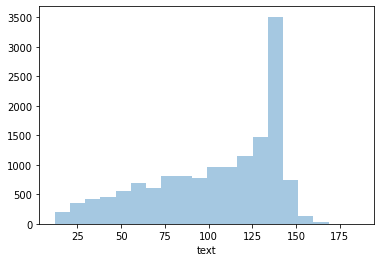

In [ ]:
# Distribution of length of tweets, in terms of number of words
sns.distplot(data['text'].str.len(), bins = 20, kde = False);

# Step 3: Text Preprocessing:

Text Preprocessing involves:
- Html tag removal.
- Tokenization.
- Remove the numbers.
- Removal of Special Characters and Punctuations.
- Conversion to lowercase.
- Lemmatize or stemming.
- Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)


In [ ]:
# Import libraries for text preprocessing
!pip install contractions
from bs4 import BeautifulSoup
import contractions
import re, string, unicodedata
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import spacy 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Define functions for text preprocessing

# Remove HTML Tags 
def strip_html(text):
  soup = BeautifulSoup(text,"html.parser")
  return soup.get_text()

# Replace Contractions in the string
def replace_contractions(text):
  return contractions.fix(text)

# Remove Special Characters
def remove_special_chars(text, remove_digits = True):
  pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' # Look for non-alphanumeric & non-spaces and remove them
  text = re.sub(pattern,'',text)
  return text 

# Removal of the http link using Regular Expression.
def remove_weblink(text):
  clean_text = re.sub(r"http\S+", "", text)
  return clean_text
 
# Remove Non-ASCII characters/ Accented Characters
def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD',word).encode('ascii','ignore').decode('utf-8','ignore')
    new_words.append(new_word)
  return new_words 

# Convert to lowercase
def to_lowercase(words):
  new_words = []
  for word in words:
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

# Remove Punctuation
def remove_punctuation(words):
  new_words = []
  for word in words:
    new_word = re.sub(r'[^\w\s]','',word)
    if new_word != '':
      new_words.append(new_word)
  return new_words

# Remove Stopwords
stopwords_list = stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')
def remove_stopwords(words):
  new_words = []
  for word in words:
    if word not in stopwords_list:
      new_words.append(word)
  return new_words

# Stemming
def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

# Lemmatization
def lemmatize_words(words):
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
    lemma = lemmatizer.lemmatize(word, pos = 'v')
    lemmas.append(lemma)
  return lemmas 

# Tokenization
def tokenize_text(text):
  return nltk.word_tokenize(text)


In [ ]:
# Example of removing weblink
print(data.at[14632,'text'])
print(re.sub(r"http\S+", "", data.at[14632, 'text']))   

“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂
“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: 


In [ ]:
# Preprocess using stemming
def normalize_s(words):
  words = remove_non_ascii(words)
  words = to_lowercase(words)
  words = remove_punctuation(words)
  words = remove_stopwords(words)
  words = stem_words(words) # Stemming
  return ' '.join(words)

In [ ]:
# Preprocess using lemmatization
def normalize_l(words):
  words = remove_non_ascii(words)
  words = to_lowercase(words)
  words = remove_punctuation(words)
  words = remove_stopwords(words)
  words = lemmatize_words(words) # Lemmatization
  return ' '.join(words)

In [ ]:
def data_preprocess(text):
  text = strip_html(text)
  text = replace_contractions(text)
  text = remove_special_chars(text)
  text = remove_weblink(text)
  words = tokenize_text(text)
  return words

In [ ]:
# Data before preprocessing
data.head() # first 5 rows

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
data.tail(10) # last 5 rows

,airline_sentiment,text
14630,positive,@AmericanAir Thanks! He is.
14631,negative,@AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.
14632,neutral,"“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂"
14633,negative,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday."
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?


In [ ]:
# preprocess data and convert into tokens
data['text'] = data['text'].apply(lambda row: data_preprocess(row))

In [ ]:
# Data after tokenization
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
data.tail(10)

,airline_sentiment,text
14630,positive,"[AmericanAir, Thanks, He, is]"
14631,negative,"[AmericanAir, thx, for, nothing, on, getting, us, out, of, the, country, and, back, to, US, Broken, plane, Come, on, Get, another, one]"
14632,neutral,"[AmericanAir, TilleyMonsta, George, that, does, not, look, good, Please, follow, this, link, to, start, the, refund, process]"
14633,negative,"[AmericanAir, my, flight, was, Cancelled, Flightled, leaving, tomorrow, morning, Auto, rebooked, for, a, Tuesday, night, flight, but, need, to, arrive, Monday]"
14634,negative,"[AmericanAir, right, on, cue, with, the, delays]"
14635,positive,"[AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago]"
14636,negative,"[AmericanAir, leaving, over, minutes, Late, Flight, No, warnings, or, communication, until, we, were, minutes, Late, Flight, that, is, called, shitty, customer, svc]"
14637,neutral,"[AmericanAir, Please, bring, American, Airlines, to, BlackBerry]"
14638,negative,"[AmericanAir, you, have, my, money, you, change, my, flight, and, do, not, answer, your, phones, Any, other, suggestions, so, I, can, make, my, commitment]"
14639,neutral,"[AmericanAir, we, have, ppl, so, we, need, know, how, many, seats, are, on, the, next, flight, Plz, put, us, on, standby, for, people, on, the, next, flight]"


In [ ]:
# Preprocess the tokens (Stemming)
data['text_stem'] = data['text'].apply(lambda row: normalize_s(row))

In [ ]:
# Preprocess the tokens (Lemmatization)
data['text_lemma'] = data['text'].apply(lambda row: normalize_l(row))

In [ ]:
# Data after stemming/lemmatization
data.head()

,airline_sentiment,text,text_stem,text_lemma
0,neutral,"[VirginAmerica, What, dhepburn, said]",virginameric dhepburn said,virginamerica dhepburn say
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",virginameric plu ad commerc expery tacky,virginamerica plus add commercials experience tacky
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",virginameric not today must mean nee tak anoth trip,virginamerica not today must mean need take another trip
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",virginameric real aggress blast obnoxy entertain guest fac littl recours,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",virginameric real big bad thing,virginamerica really big bad thing


In [ ]:
data.tail()

,airline_sentiment,text,text_stem,text_lemma
14635,positive,"[AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago]",americanair thank got diff flight chicago,americanair thank get different flight chicago
14636,negative,"[AmericanAir, leaving, over, minutes, Late, Flight, No, warnings, or, communication, until, we, were, minutes, Late, Flight, that, is, called, shitty, customer, svc]",americanair leav minut lat flight no warn commun minut lat flight cal shitty custom svc,americanair leave minutes late flight no warn communication minutes late flight call shitty customer svc
14637,neutral,"[AmericanAir, Please, bring, American, Airlines, to, BlackBerry]",americanair pleas bring am airlin blackberry,americanair please bring american airlines blackberry
14638,negative,"[AmericanAir, you, have, my, money, you, change, my, flight, and, do, not, answer, your, phones, Any, other, suggestions, so, I, can, make, my, commitment]",americanair money chang flight not answ phon suggest mak commit,americanair money change flight not answer phone suggestions make commitment
14639,neutral,"[AmericanAir, we, have, ppl, so, we, need, know, how, many, seats, are, on, the, next, flight, Plz, put, us, on, standby, for, people, on, the, next, flight]",americanair ppl nee know many seat next flight plz put us standby peopl next flight,americanair ppl need know many seat next flight plz put us standby people next flight


> **Stemming** just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. **Lemmatization** considers the context and converts the word to its meaningful base form, which is called Lemma. 

Examples
- Index 1: 'commercials' -> 'commerc' (stem) & 'commercials' (lemma) 
- Index 3: 'faces' -> 'fac' (stem) & 'face' (lemma)
- Index 14635: 'got' -> 'got' (stem) & 'get' (lemma)
- Index 14638: 'phones' -> 'phon' (stem) & 'phone' (lemma)

> Hence, by Stemming we are loosing context because some of the important words become meaningless stems. It makes more sense to use Lemmatization which adds value to the context. eg. word 'phone' is useful when deciding whether customer service on call is being talked about in a positive/negative way. Although, we still continue to build models using both stemming/lemmatization and make our choice later on.

In [ ]:
# Label encoding of target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(data['airline_sentiment'])

In [ ]:
labels

array([1, 2, 1, ..., 1, 0, 1])

In [ ]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
labels_dict = {0: 'negative',
               1: 'neutral',
               2: 'positive'}

In [ ]:
# One hot encoding of target variable (for neural network)
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels, num_classes = 3)
print(y)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
# Shape of categorical target variable (for neural network)
y.shape

(14640, 3)

# Step 4: Split Dataset:

In [ ]:
# Split dataset into training & testing set (Stemming)
from sklearn.model_selection import train_test_split
stem_x_train, stem_x_test, stem_y_train, stem_y_test = train_test_split(data['text_stem'], labels, 
                                                    test_size = 0.3, random_state = 0)
print("Training Set:")
print(stem_x_train.shape)
print(stem_y_train.shape)
print(' ')
print("Testing Set:")
print(stem_x_test.shape)
print(stem_y_test.shape)

Training Set:
(10248,)
(10248,)
 
Testing Set:
(4392,)
(4392,)


In [ ]:
# Split dataset into training, validation & testing set (Lemmatization)
lemma_x_train, lemma_x_test, lemma_y_train, lemma_y_test = train_test_split(data['text_lemma'], labels, 
                                                    test_size = 0.3, random_state = 0)
print("Training Set:")
print(lemma_x_train.shape)
print(lemma_y_train.shape)
print(' ')
print("Testing Set:")
print(lemma_x_test.shape)
print(lemma_y_test.shape)

Training Set:
(10248,)
(10248,)
 
Testing Set:
(4392,)
(4392,)


# Step 5: Vectorization:

## 5a. CountVectorizer (Bag of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_c = CountVectorizer(max_features= 1000)

In [ ]:
# Convert text to numbers (Stemming)
stem_x_train_c = vectorizer_c.fit_transform(stem_x_train)
stem_x_train_c = stem_x_train_c.toarray()
print(stem_x_train_c.shape)

stem_x_test_c = vectorizer_c.transform(stem_x_test)
stem_x_test_c = stem_x_test_c.toarray()

(10248, 1000)


In [ ]:
# Convert text to numbers (Lemmatization)
lemma_x_train_c = vectorizer_c.fit_transform(lemma_x_train)
lemma_x_train_c = lemma_x_train_c.toarray()
print(lemma_x_train_c.shape)

lemma_x_test_c = vectorizer_c.transform(lemma_x_test)
lemma_x_test_c = lemma_x_test_c.toarray()

(10248, 1000)


## 5b. Tf-idf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_t = TfidfVectorizer(max_features=1000)

In [ ]:
# Convert text to numbers (Stemming)
stem_x_train_t = vectorizer_t.fit_transform(stem_x_train)
stem_x_train_t = stem_x_train_t.toarray()
print(stem_x_train_t.shape)

stem_x_test_t = vectorizer_t.transform(stem_x_test)
stem_x_test_t = stem_x_test_t.toarray()

(10248, 1000)


In [ ]:
# Convert text to numbers (Lemmatization)
lemma_x_train_t = vectorizer_t.fit_transform(lemma_x_train)
lemma_x_train_t = lemma_x_train_t.toarray()
print(lemma_x_train_t.shape)

lemma_x_test_t = vectorizer_t.transform(lemma_x_test)
lemma_x_test_t = lemma_x_test_t.toarray()

(10248, 1000)


# Step 6: Model Training:

In [ ]:
# Import libraries for model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression


## 6a. Random Forest Classifier:

### Bag of Words

0.7639548619790737
Predictions  [0 0 0 ... 0 0 1]

Confusion Matrix:
[[2495  230   63]
 [ 371  446  102]
 [ 164  113  408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2788
           1       0.57      0.49      0.52       919
           2       0.71      0.60      0.65       685

    accuracy                           0.76      4392
   macro avg       0.70      0.66      0.68      4392
weighted avg       0.75      0.76      0.75      4392

F1 score:  0.7548931718560254


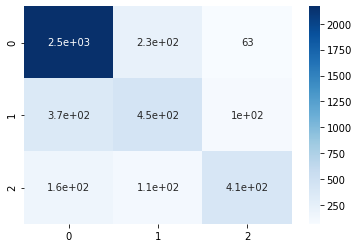

In [ ]:
# Build classifier using text after Stemming 
stem_forest_c = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
stem_forest_c = stem_forest_c.fit(stem_x_train_c, stem_y_train)

# Cross-Validation
print(np.mean(cross_val_score(stem_forest_c, stem_x_train_c, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_c = stem_forest_c.predict(stem_x_test_c)
print('Predictions ',stem_result_c)

# Confusion Matrix

stem_cf_c = confusion_matrix(stem_y_test, stem_result_c)
print('\nConfusion Matrix:')
print(stem_cf_c)
sns.heatmap(stem_cf_c, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_c))

# F1 Score
stem_bow1 = f1_score(stem_y_test, stem_result_c, average= 'weighted')
print('F1 score: ',stem_bow1)

0.7650277946410503
Predictions  [0 0 0 ... 0 0 1]

Confusion Matrix:
[[2476  222   90]
 [ 349  458  112]
 [ 142  111  432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2788
           1       0.58      0.50      0.54       919
           2       0.68      0.63      0.66       685

    accuracy                           0.77      4392
   macro avg       0.70      0.67      0.68      4392
weighted avg       0.76      0.77      0.76      4392

F1 Score:  0.7604678084396457


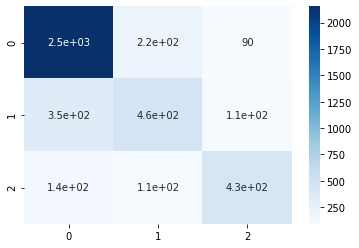

In [ ]:
# Build classifier using text after Stemming & use balanced class weight
stem_forest_c_bal = RandomForestClassifier(n_estimators = 100, n_jobs = 4, class_weight= 'balanced') 
stem_forest_c_bal = stem_forest_c_bal.fit(stem_x_train_c, stem_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(stem_forest_c_bal, stem_x_train_c, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_c_bal = stem_forest_c_bal.predict(stem_x_test_c)
print('Predictions ',stem_result_c_bal)

# Confusion Matrix
stem_cf_c_bal = confusion_matrix(stem_y_test, stem_result_c_bal)
print('\nConfusion Matrix:')
print(stem_cf_c_bal)
sns.heatmap(stem_cf_c_bal, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_c_bal))

# F1 Score
stem_bow2 = f1_score(stem_y_test, stem_result_c_bal, average= 'weighted')
print('F1 Score: ', stem_bow2)

0.7650285564641883
Predictions:  [0 0 0 ... 0 0 2]

Confusion Matrix:
[[2493  219   76]
 [ 379  440  100]
 [ 165  122  398]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2788
           1       0.56      0.48      0.52       919
           2       0.69      0.58      0.63       685

    accuracy                           0.76      4392
   macro avg       0.69      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392

F1 Score:  0.7502822576297291


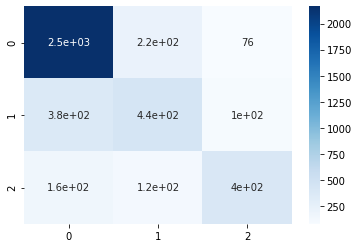

In [ ]:
# Build classifier using text after Lemmatization
lemma_forest_c = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
lemma_forest_c = lemma_forest_c.fit(lemma_x_train_c, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_forest_c, lemma_x_train_c, lemma_y_train, cv = 5)))

# Predict the result for test set
lemma_result_c = lemma_forest_c.predict(lemma_x_test_c)
print('Predictions: ',lemma_result_c)

# Confusion Matrix
lemma_cf_c = confusion_matrix(lemma_y_test, lemma_result_c)
print('\nConfusion Matrix:')
print(lemma_cf_c)
sns.heatmap(lemma_cf_c, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_c))

# F1 Score
lemma_bow1 = f1_score(lemma_y_test, lemma_result_c, average= 'weighted')
print('F1 Score: ',lemma_bow1)

Predictions:  [0 0 0 ... 0 0 2]

Confusion Matrix:
[[2487  216   85]
 [ 357  457  105]
 [ 147  117  421]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2788
           1       0.58      0.50      0.53       919
           2       0.69      0.61      0.65       685

    accuracy                           0.77      4392
   macro avg       0.70      0.67      0.68      4392
weighted avg       0.76      0.77      0.76      4392

F1 Score:  0.7596022048112026


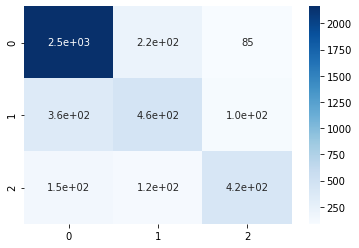

In [ ]:
# Build classifier using text after Lemmatization & use balanced class weight
lemma_forest_c_bal = RandomForestClassifier(n_estimators = 100, n_jobs = 4, class_weight= 'balanced') # for balanced classes
lemma_forest_c_bal = lemma_forest_c_bal.fit(lemma_x_train_c, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_forest_c_bal, lemma_x_train_c, lemma_y_train, cv = 5)))

# Predict the result for test set
lemma_result_c_bal = lemma_forest_c_bal.predict(lemma_x_test_c)
print('Predictions: ',lemma_result_c_bal)

# Confusion Matrix
lemma_cf_c_bal = confusion_matrix(lemma_y_test, lemma_result_c_bal)
print('\nConfusion Matrix:')
print(lemma_cf_c_bal)
sns.heatmap(lemma_cf_c_bal, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_c_bal))

# F1 Score
lemma_bow2 = f1_score(lemma_y_test, lemma_result_c_bal, average= 'weighted')
print('F1 Score: ',lemma_bow2)

### TF-IDF:

0.7671751836112797

Confusion Matrix:
[[2588  160   40]
 [ 444  402   73]
 [ 212  112  361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2788
           1       0.60      0.44      0.50       919
           2       0.76      0.53      0.62       685

    accuracy                           0.76      4392
   macro avg       0.72      0.63      0.66      4392
weighted avg       0.75      0.76      0.75      4392

F1 Score:  0.747473472481199


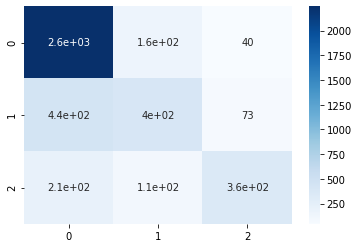

In [ ]:
# Build classifier using text after Stemming 
stem_forest_t = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
stem_forest_t = stem_forest_t.fit(stem_x_train_t, stem_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(stem_forest_t, stem_x_train_t, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_t = stem_forest_t.predict(stem_x_test_t)

# Confusion Matrix
stem_cf_t = confusion_matrix(stem_y_test, stem_result_t)
print('\nConfusion Matrix:')
print(stem_cf_t)
sns.heatmap(stem_cf_t, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_t))

# F1 Score
stem_tf1 = f1_score(stem_y_test, stem_result_t, average= 'weighted')
print('F1 Score: ',stem_tf1)

0.7697130545536789

Confusion Matrix:
[[2536  205   47]
 [ 393  443   83]
 [ 183  119  383]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2788
           1       0.58      0.48      0.53       919
           2       0.75      0.56      0.64       685

    accuracy                           0.77      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.75      0.77      0.76      4392

F1 Score:  0.755387419091622


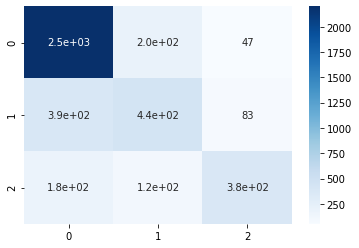

In [ ]:
# Build classifier using text after Stemming & use balanced class weight
stem_forest_t_bal = RandomForestClassifier(n_estimators = 100, n_jobs = 4, class_weight= 'balanced')
stem_forest_t_bal = stem_forest_t_bal.fit(stem_x_train_t, stem_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(stem_forest_t_bal, stem_x_train_t, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_t_bal = stem_forest_t_bal.predict(stem_x_test_t)

# Confusion Matrix
stem_cf_t_bal = confusion_matrix(stem_y_test, stem_result_t_bal)
print('\nConfusion Matrix:')
print(stem_cf_t_bal)
sns.heatmap(stem_cf_t_bal, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_t_bal))

# F1 Score
stem_tf2 = f1_score(stem_y_test, stem_result_t_bal, average= 'weighted')
print('F1 Score: ',stem_tf2)

0.7686394076825102

Confusion Matrix:
[[2582  166   40]
 [ 447  402   70]
 [ 211  110  364]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2788
           1       0.59      0.44      0.50       919
           2       0.77      0.53      0.63       685

    accuracy                           0.76      4392
   macro avg       0.72      0.63      0.66      4392
weighted avg       0.75      0.76      0.75      4392

0.7471141398614851


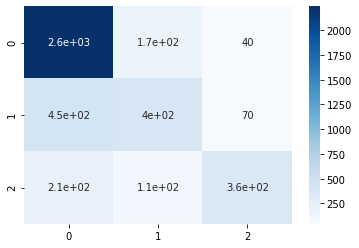

In [ ]:
# Build classifier using text after Lemmatization
lemma_forest_t = RandomForestClassifier(n_estimators = 100, n_jobs = 4)
lemma_forest_t = lemma_forest_t.fit(lemma_x_train_t, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_forest_t, lemma_x_train_t, lemma_y_train, cv = 5)))

# Predict the result for test set
lemma_result_t = lemma_forest_t.predict(lemma_x_test_t)

# Confusion Matrix
lemma_cf_t = confusion_matrix(lemma_y_test, lemma_result_t)
print('\nConfusion Matrix:')
print(lemma_cf_t)
sns.heatmap(lemma_cf_t, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_t))

# F1 Score
lemma_tf1 = f1_score(lemma_y_test, lemma_result_t, average= 'weighted')
print(lemma_tf1)

0.7711758025925792

Confusion Matrix:
[[2526  210   52]
 [ 397  450   72]
 [ 180  126  379]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2788
           1       0.57      0.49      0.53       919
           2       0.75      0.55      0.64       685

    accuracy                           0.76      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392

0.7543479462475905


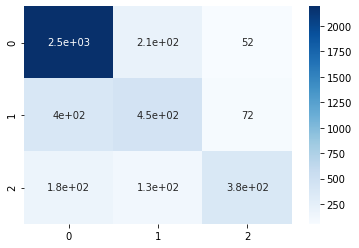

In [ ]:
# Build classifier using text after Lemmatization & use balanced class weight
lemma_forest_t_bal = RandomForestClassifier(n_estimators = 100, n_jobs = 4, class_weight= 'balanced')
lemma_forest_t_bal = lemma_forest_t_bal.fit(lemma_x_train_t, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_forest_t_bal, lemma_x_train_t, lemma_y_train , cv = 5)))

# Predict the result for test set
lemma_result_t_bal = lemma_forest_t_bal.predict(lemma_x_test_t)

# Confusion Matrix
lemma_cf_t_bal = confusion_matrix(lemma_y_test, lemma_result_t_bal)
print('\nConfusion Matrix:')
print(lemma_cf_t_bal)
sns.heatmap(lemma_cf_t_bal, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_t_bal))

# F1 Score
lemma_tf2 = f1_score(lemma_y_test, lemma_result_t_bal, average= 'weighted')
print(lemma_tf2)

## 6b. Logistic Regression:

### Bag of Words:

0.7448290540299254

Confusion Matrix:
[[2136  485  167]
 [ 161  638  120]
 [  65  123  497]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2788
           1       0.51      0.69      0.59       919
           2       0.63      0.73      0.68       685

    accuracy                           0.74      4392
   macro avg       0.68      0.73      0.70      4392
weighted avg       0.78      0.74      0.76      4392

F1 Score:  0.7554256237914506


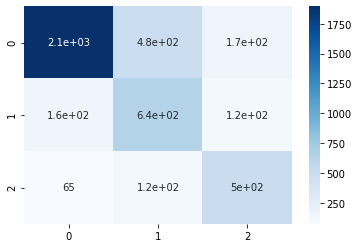

In [ ]:
# Build classifier using text after Stemming & use balanced class weight
stem_logistic_c = LogisticRegression(class_weight= 'balanced')
stem_logistic_c = stem_logistic_c.fit(stem_x_train_c, stem_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(stem_logistic_c, stem_x_train_c, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_logistic_c = stem_logistic_c.predict(stem_x_test_c)

# Confusion Matrix
stem_cf_logistic_c = confusion_matrix(stem_y_test, stem_result_logistic_c)
print('\nConfusion Matrix:')
print(stem_cf_logistic_c)
sns.heatmap(stem_cf_logistic_c, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_logistic_c))

# F1 Score
stem_logistic_bow1 = f1_score(stem_y_test, stem_result_logistic_c, average= 'weighted')
print('F1 Score: ', stem_logistic_bow1)

0.746098060922044

Confusion Matrix:
[[2134  484  170]
 [ 166  633  120]
 [  66  120  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2788
           1       0.51      0.69      0.59       919
           2       0.63      0.73      0.68       685

    accuracy                           0.74      4392
   macro avg       0.68      0.73      0.70      4392
weighted avg       0.78      0.74      0.75      4392

F1 Score:  0.7541338378620461


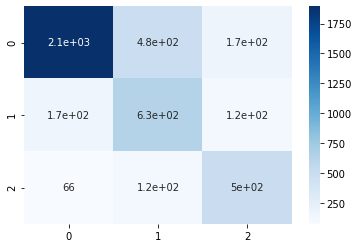

In [ ]:
# Build classifier using text after Lemmatization & use balanced class weight
lemma_logistic_c = LogisticRegression(class_weight= 'balanced')
lemma_logistic_c = lemma_logistic_c.fit(lemma_x_train_c, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_logistic_c, lemma_x_train_c, lemma_y_train, cv = 5)))

# Predict the result for test set
lemma_result_logistic_c = lemma_logistic_c.predict(lemma_x_test_c)

# Confusion Matrix
lemma_cf_logistic_c = confusion_matrix(lemma_y_test, lemma_result_logistic_c)
print('\nConfusion Matrix:')
print(lemma_cf_logistic_c)
sns.heatmap(lemma_cf_logistic_c, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_logistic_c))

# F1-Score
lemma_logistic_bow1 = f1_score(lemma_y_test, lemma_result_logistic_c, average= 'weighted')
print('F1 Score: ',lemma_logistic_bow1)

### TF-IDF:

0.7581002987775121

Confusion Matrix:
[[2171  470  147]
 [ 172  633  114]
 [  61  125  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      2788
           1       0.52      0.69      0.59       919
           2       0.66      0.73      0.69       685

    accuracy                           0.75      4392
   macro avg       0.69      0.73      0.71      4392
weighted avg       0.78      0.75      0.76      4392

0.7619683296115947


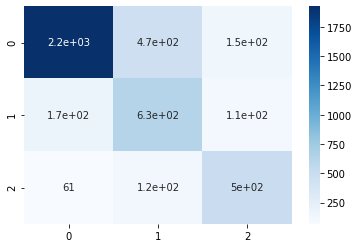

In [ ]:
# Build classifier using text after Stemming & use balanced class weight
stem_logistic_t = LogisticRegression(class_weight= 'balanced')
stem_logistic_t = stem_logistic_t.fit(stem_x_train_t, stem_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(stem_logistic_t, stem_x_train_t, stem_y_train, cv = 5)))

# Predict the result for test set
stem_result_logistic_t = stem_logistic_t.predict(stem_x_test_t)

# Confusion Matrix
stem_cf_logistic_t = confusion_matrix(stem_y_test, stem_result_logistic_t)
print('\nConfusion Matrix:')
print(stem_cf_logistic_t)
sns.heatmap(stem_cf_logistic_t, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(stem_y_test, stem_result_logistic_t))

# F1 Score
stem_logistic_tf1 = f1_score(stem_y_test, stem_result_logistic_t, average= 'weighted')
print(stem_logistic_tf1)

0.7588807865823901

Confusion Matrix:
[[2208  436  144]
 [ 178  624  117]
 [  64  119  502]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2788
           1       0.53      0.68      0.59       919
           2       0.66      0.73      0.69       685

    accuracy                           0.76      4392
   macro avg       0.70      0.73      0.71      4392
weighted avg       0.79      0.76      0.77      4392

F1 Score:  0.7677838299207153


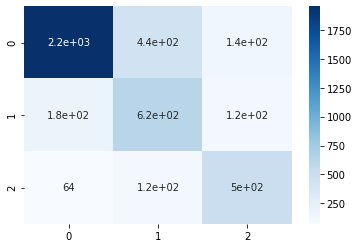

In [ ]:
# Build classifier using text after Lemmatization & use balanced class weight
lemma_logistic_t = LogisticRegression(class_weight= 'balanced')
lemma_logistic_t = lemma_logistic_t.fit(lemma_x_train_t, lemma_y_train)

# Cross- Validation 
print(np.mean(cross_val_score(lemma_logistic_t, lemma_x_train_t, lemma_y_train, cv = 5)))

# Predict the result for test set
lemma_result_logistic_t = lemma_logistic_t.predict(lemma_x_test_t)

# Confusion Matrix
lemma_cf_logistic_t = confusion_matrix(lemma_y_test, lemma_result_logistic_t)
print('\nConfusion Matrix:')
print(lemma_cf_logistic_t)
sns.heatmap(lemma_cf_logistic_t, annot = True, robust = True, cmap = 'Blues');

# Classification Report
print('\nClassification Report:')
print(classification_report(lemma_y_test, lemma_result_logistic_t))

# F1 Score
lemma_logistic_tf1 = f1_score(lemma_y_test, lemma_result_logistic_t, average= 'weighted')
print('F1 Score: ',lemma_logistic_tf1)

## 6c. Artificial Neural Network:

In [ ]:
# Import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [ ]:
# Set the batch size, number of epochs, classes to classify
batch_size = 32
epochs = 40
num_classes = 3

In [ ]:
# Split Dataset into Training & Testing set (Only Lemmatization)
X_train, X_test, Y_train, Y_test = train_test_split(data['text_lemma'], y, stratify = y, test_size = 0.3, random_state = 0)

In [ ]:
# TF-IDF Vectorization
vectorizer_ann = TfidfVectorizer(max_features=1000)
X_train = vectorizer_ann.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

X_test = vectorizer_ann.transform(X_test)
X_test = X_test.toarray()

(10248, 1000)


In [ ]:
# Shape of X and Y
print("X train: {}".format(X_train.shape))
print("Y train: {}".format(Y_train.shape))
print("X test: {}".format(X_test.shape))
print("Y test: {}".format(Y_test.shape))

X train: (10248, 1000)
Y train: (10248, 3)
X test: (4392, 1000)
Y test: (4392, 3)


In [ ]:
# Build ANN Model 

## Use 'adam' optimizer and 'categorical_crossentropy' as loss function 
## Use 2 hidden layers with neurons 6, 20 resp. and 'relu' activation layer
## Use input_shape = 11 since we have 11 features. 
## Use 1 neuron in output layer with 'sigmoid' activation function

Model1 = Sequential()
Model1.add(Dense(units = 6, activation = 'relu', input_shape = (1000,)))
Model1.add(Dense(units = 20, activation = 'relu'))
Model1.add(Dense(units = 3, activation = 'softmax'))
Model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 6006      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit Model 

## Use 40 epochs and 32 batch size
## Use 10% of the training data as validation data

Ann1 = Model1.fit(X_train, Y_train,
                batch_size = 32,
                epochs = 40,
                validation_split = 0.10,
                verbose =1)

Epoch 1/40
289/289 [==============================] - 2s 4ms/step - loss: 0.9657 - accuracy: 0.5989 - val_loss: 0.6917 - val_accuracy: 0.6829
Epoch 2/40
289/289 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7505 - val_loss: 0.5530 - val_accuracy: 0.7737
Epoch 3/40
289/289 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.8260 - val_loss: 0.5325 - val_accuracy: 0.7912
Epoch 4/40
289/289 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8443 - val_loss: 0.5445 - val_accuracy: 0.7893
Epoch 5/40
289/289 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8522 - val_loss: 0.5409 - val_accuracy: 0.7893
Epoch 6/40
289/289 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8470 - val_loss: 0.5544 - val_accuracy: 0.7844
Epoch 7/40
289/289 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8524 - val_loss: 0.5591 - val_accuracy: 0.7785
Epoch 

In [ ]:
# Training vs Testing score to check overfitting

score1_train = Model1.evaluate(X_train, Y_train, verbose = 1)
print(score1_train)
score1_test = Model1.evaluate(X_test, Y_test, verbose = 1)
print(score1_test)

print("\nTraining Score: {}%".format(round(score1_train[1]*100,3)))
print("Testing Score: {}%".format(round(score1_test[1]*100,3)))

321/321 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8938
[0.31182509660720825, 0.8938329219818115]
138/138 [==============================] - 0s 1ms/step - loss: 0.8447 - accuracy: 0.7491
[0.8446932435035706, 0.749089241027832]

Training Score: 89.383%
Testing Score: 74.909%


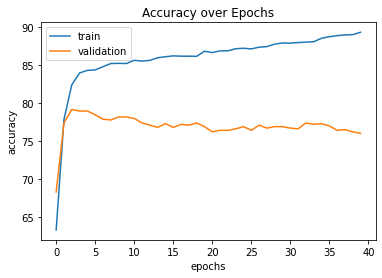

In [ ]:
# Plot accuracy over epochs

plt.plot(np.array(Ann1.history['accuracy'])*100)
plt.plot(np.array(Ann1.history['val_accuracy']) *100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy over Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
# Make Predictions on Test set
Y_pred = Model1.predict(X_test)
print(Y_pred)

[[9.4472200e-01 3.8595755e-02 1.6682213e-02]
 [9.9520361e-01 4.7919136e-03 4.5193788e-06]
 [9.9987197e-01 1.1378955e-04 1.4185379e-05]
 ...
 [9.9999940e-01 5.4865035e-07 1.0501231e-08]
 [9.5341659e-01 4.1885827e-02 4.6976828e-03]
 [2.4547637e-01 7.3828596e-01 1.6237702e-02]]


In [ ]:
Y_pred_label = np.zeros(Y_pred.shape[0])
for i in range(0,len(Y_pred)):
  Y_pred_label[i] = np.argmax(Y_pred[i])

Y_pred_label

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
Y_test_label = np.zeros(Y_test.shape[0])
for i in range(0,len(Y_test)):
  Y_test_label[i] = np.argmax(Y_test[i])

Y_test_label

array([0., 0., 0., ..., 0., 2., 0.])

In [ ]:
cm = confusion_matrix(Y_test_label, Y_pred_label)
print(cm)

[[2353  264  136]
 [ 311  467  152]
 [ 119  120  470]]


In [ ]:
print(classification_report(Y_test_label, Y_pred_label))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2753
         1.0       0.55      0.50      0.52       930
         2.0       0.62      0.66      0.64       709

    accuracy                           0.75      4392
   macro avg       0.67      0.67      0.67      4392
weighted avg       0.75      0.75      0.75      4392



In [ ]:
f1 = f1_score(Y_test_label, Y_pred_label, average= 'weighted')
print(f1)

0.7473280916051918


# Step 7: Model Evaluation:

In [ ]:
# Create multi-index
array = [['Bag of Words','Bag of Words','Bag of Words',
          'TF-IDF', 'TF-IDF', 'TF-IDF'],
         ['Random Forest Classifier (RFC)','RFC (with balanced data)', 'Logistic Regression',
          'Random Forest Classifier (RFC)','RFC (with balanced data)', 'Logistic Regression']]
index = pd.MultiIndex.from_arrays(array, names=('Vectorization', 'Models'))

In [ ]:
# Summary (Stemming)
stem_df = pd.DataFrame({ 'Training Accuracy' : [accuracy_score(stem_y_train, stem_forest_c.predict(stem_x_train_c)), 
                                                accuracy_score(stem_y_train, stem_forest_c_bal.predict(stem_x_train_c)), 
                                                accuracy_score(stem_y_train, stem_logistic_c.predict(stem_x_train_c)),
                                                accuracy_score(stem_y_train, stem_forest_t.predict(stem_x_train_t)), 
                                                accuracy_score(stem_y_train, stem_forest_t_bal.predict(stem_x_train_t)), 
                                                accuracy_score(stem_y_train, stem_logistic_t.predict(stem_x_train_t))],
                         'Testing Accuracy' : [accuracy_score(stem_y_test, stem_result_c),
                                               accuracy_score(stem_y_test, stem_result_c_bal),
                                               accuracy_score(stem_y_test, stem_result_logistic_c),
                                               accuracy_score(stem_y_test, stem_result_t),
                                               accuracy_score(stem_y_test, stem_result_t_bal),
                                               accuracy_score(stem_y_test, stem_result_logistic_t)],
                         'Recall' : [recall_score(stem_y_test, stem_result_c, average= 'weighted'),
                                     recall_score(stem_y_test, stem_result_c_bal, average= 'weighted'),
                                     recall_score(stem_y_test, stem_result_logistic_c, average= 'weighted'),
                                     recall_score(stem_y_test, stem_result_t, average= 'weighted'),
                                     recall_score(stem_y_test, stem_result_t_bal, average= 'weighted'),
                                     recall_score(stem_y_test, stem_result_logistic_t, average= 'weighted')],
                         'Precision' : [precision_score(stem_y_test, stem_result_c, average= 'weighted'),
                                        precision_score(stem_y_test, stem_result_c_bal, average= 'weighted'),
                                        precision_score(stem_y_test, stem_result_logistic_c, average= 'weighted'),
                                        precision_score(stem_y_test, stem_result_t, average= 'weighted'),
                                        precision_score(stem_y_test, stem_result_t_bal, average= 'weighted'),
                                        precision_score(stem_y_test, stem_result_logistic_t, average= 'weighted')],
                         'F1 Score' : [stem_bow1,stem_bow2, stem_logistic_bow1,
                                       stem_tf1, stem_tf2, stem_logistic_tf1]},
                       index = index )
stem_df

Training Accuracy  ...  F1 Score
Vectorization Models                                             ...          
Bag of Words  Random Forest Classifier (RFC)           0.992779  ...  0.754893
              RFC (with balanced data)                 0.992779  ...  0.760468
              Logistic Regression                      0.822112  ...  0.755426
TF-IDF        Random Forest Classifier (RFC)           0.992779  ...  0.747473
              RFC (with balanced data)                 0.992779  ...  0.755387
              Logistic Regression                      0.813525  ...  0.761968

[6 rows x 5 columns]

In [ ]:
# Summary (Lemmatization)
lemma_df = pd.DataFrame({ 'Training Accuracy' : [accuracy_score(lemma_y_train, lemma_forest_c.predict(lemma_x_train_c)), 
                                                accuracy_score(lemma_y_train, lemma_forest_c_bal.predict(lemma_x_train_c)), 
                                                accuracy_score(lemma_y_train, lemma_logistic_c.predict(lemma_x_train_c)),
                                                accuracy_score(lemma_y_train, lemma_forest_t.predict(lemma_x_train_t)), 
                                                accuracy_score(lemma_y_train, lemma_forest_t_bal.predict(lemma_x_train_t)), 
                                                accuracy_score(lemma_y_train, lemma_logistic_t.predict(lemma_x_train_t))],
                         'Testing Accuracy' : [accuracy_score(lemma_y_test, lemma_result_c),
                                               accuracy_score(lemma_y_test, lemma_result_c_bal),
                                               accuracy_score(lemma_y_test, lemma_result_logistic_c),
                                               accuracy_score(lemma_y_test, lemma_result_t),
                                               accuracy_score(lemma_y_test, lemma_result_t_bal),
                                               accuracy_score(lemma_y_test, lemma_result_logistic_t)],
                         'Recall' : [recall_score(lemma_y_test, lemma_result_c, average= 'weighted'),
                                     recall_score(lemma_y_test, lemma_result_c_bal, average= 'weighted'),
                                     recall_score(lemma_y_test, lemma_result_logistic_c, average= 'weighted'),
                                     recall_score(lemma_y_test, lemma_result_t, average= 'weighted'),
                                     recall_score(lemma_y_test, lemma_result_t_bal, average= 'weighted'),
                                     recall_score(lemma_y_test, lemma_result_logistic_t, average= 'weighted')],
                         'Precision' : [precision_score(lemma_y_test, lemma_result_c, average= 'weighted'),
                                        precision_score(lemma_y_test, lemma_result_c_bal, average= 'weighted'),
                                        precision_score(lemma_y_test, lemma_result_logistic_c, average= 'weighted'),
                                        precision_score(lemma_y_test, lemma_result_t, average= 'weighted'),
                                        precision_score(lemma_y_test, lemma_result_t_bal, average= 'weighted'),
                                        precision_score(lemma_y_test, lemma_result_logistic_t, average= 'weighted')],
                         'F1 Score' : [lemma_bow1,lemma_bow2, lemma_logistic_bow1,
                                       lemma_tf1, lemma_tf2, lemma_logistic_tf1]},
                       index = index )
lemma_df

Training Accuracy  ...  F1 Score
Vectorization Models                                             ...          
Bag of Words  Random Forest Classifier (RFC)           0.991413  ...  0.750282
              RFC (with balanced data)                 0.991413  ...  0.759602
              Logistic Regression                      0.821331  ...  0.754134
TF-IDF        Random Forest Classifier (RFC)           0.991315  ...  0.747114
              RFC (with balanced data)                 0.991218  ...  0.754348
              Logistic Regression                      0.814403  ...  0.767784

[6 rows x 5 columns]

In [ ]:
# Compare Accuracy, Recall, Precision & F1 Score for 2 best models
from sklearn.metrics import recall_score, precision_score, accuracy_score
df2 = pd.DataFrame(data = { 'Training Accuracy' : [accuracy_score(stem_y_train,stem_logistic_t.predict(stem_x_train_t)), 
                                                   accuracy_score(lemma_y_train,lemma_logistic_t.predict(lemma_x_train_t))],
                           'Testing Accuracy' : [accuracy_score(stem_y_test, stem_result_logistic_t), 
                                                 accuracy_score(lemma_y_test, lemma_result_logistic_t)],
                            'Recall' : [recall_score(stem_y_test, stem_result_logistic_t, average= 'weighted'),
                                        recall_score(lemma_y_test, lemma_result_logistic_t , average= 'weighted')],
                            'Precision' : [precision_score(stem_y_test, stem_result_logistic_t, average= 'weighted'), 
                                          precision_score(lemma_y_test, lemma_result_logistic_t, average= 'weighted')],
                            'F1 Score' : [stem_logistic_tf1, lemma_logistic_tf1],
                            'TF-IDF (Logistic Regression)': ['Stemming', 'Lemmatization']})
df2.set_index('TF-IDF (Logistic Regression)', inplace = True)
df2

,Training Accuracy,Testing Accuracy,Recall,Precision,F1 Score
TF-IDF (Logistic Regression),,,,,
Stemming,0.813525,0.752049,0.752049,0.783529,0.761968
Lemmatization,0.814403,0.759107,0.759107,0.785448,0.767784


> Highest F1 score is for TF-IDF vectorization with Logistic Regression Classifier (using balanced dataset) and using Lemmatization, which is about 0.7677

In [ ]:
# Summary of ANN built using TF-IDF & Lemmatization

df3 = pd.DataFrame(data = { 'Training Accuracy' : [score1_train[1], 
                                                   accuracy_score(lemma_y_train,lemma_logistic_t.predict(lemma_x_train_t))],
                           'Testing Accuracy' : [score1_test[1],
                                                 accuracy_score(lemma_y_test, lemma_result_logistic_t)],
                            'Recall' : [recall_score(Y_test_label, Y_pred_label, average= 'weighted'),
                                        recall_score(lemma_y_test, lemma_result_logistic_t , average= 'weighted')],
                            'Precision' : [precision_score(Y_test_label, Y_pred_label, average= 'weighted'), 
                                          precision_score(lemma_y_test, lemma_result_logistic_t, average= 'weighted')],
                            'F1 Score' : [f1, lemma_logistic_tf1],
                            'TF-IDF (Lemmatization)': [ 'Artificial Neural Network', 'Logistic Regression']})
df3.set_index('TF-IDF (Lemmatization)', inplace = True)
df3


,Training Accuracy,Testing Accuracy,Recall,Precision,F1 Score
TF-IDF (Lemmatization),,,,,
Artificial Neural Network,0.893833,0.749089,0.749089,0.746267,0.747328
Logistic Regression,0.814403,0.759107,0.759107,0.785448,0.767784


> Logistic Regression has 81.4% training accuracy and 75.9% testing accuracy, which improves the overfitting problem as compared to Artificial Neural Network. The 'weighted' recall and 'weighted' precision is higher for Logistic Regression. Also, the 'weighted' F1 is higher for Logistic Regression i.e. 0.7677. This is the best model. 

# Conclusion:

- ***Text preprocessing*** steps include removing html tags (if any), getting rid of numbers/accented characters/non-ascii/weblinks/punctuations, removing stopwords that dont add much meaning to the text, convert the text to lowercase so words with different cases are not treated differently, and also convert the text into words or tokens to be treated separately (and create vocabulary list for model).
- Further we use ***lemmatization*** to get useful lemmas from clean text instead of stemming that probably is loosing context because it creates stems that may or may not have dictionary meaning. The evaluation metrics for lemmatization is also better than stemming. 
- We convert the text into numbers by using two approaches 'Bag of Words' and 'TF-IDF'
  - ***Bag of words*** counts the frequency of words in the vocabulary and creates a document-term matrix that can be used as input features to build the model later. Each word gets equal weightage in this case. 
  - ***TF-IDF***, on the contrary tells how important a word is to the document by comparing it to other documents as well. Frequently occuring words are given less weightage as compared to less frequent words, that helps in differentiating the documents. Here TF is the term frequency (tells how important a word is to a document) and IDF is Inverse document frequency (tells if a word can be used to distinguish documents).
- One way to improve bag of words model is to use N-grams to keep the order and retain context, however, we chose TF-IDF vectorization.

>**Therefore, considering the overfitting problem, we select the Logistic Regression classification model that uses lemmatization & TF-IDF vectorization to get an training accuracy of 81.4%, testing accuracy of 75.9%, weighter recall of 75.9%, weighted precision of 78.5%, and weighted F1 score of 76.7%.** 
